In [47]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline



In [63]:
df = pd.read_csv('./data/transformed/mm_wgi_fiw.csv')

In [62]:
df.dtypes

country_name                    object
year                             int64
region                           int64
protestnumber                    int64
protesterviolence                int64
participants_category            int64
stateresponse1                   int64
start_date                      object
end_date                        object
duration                        object
labor wage dispute               int64
land farm issue                  int64
police brutality                 int64
political behavior, process      int64
price increases, tax policy      int64
removal of politician            int64
social restrictions              int64
CC.EST                         float64
GE.EST                         float64
PV.NO.SRC                      float64
RL.EST                         float64
VA.EST                         float64
fiw_status                       int64
dtype: object

In [61]:
df.isna().sum()

country_name                   0
year                           0
region                         0
protestnumber                  0
protesterviolence              0
participants_category          0
stateresponse1                 0
start_date                     0
end_date                       0
duration                       0
labor wage dispute             0
land farm issue                0
police brutality               0
political behavior, process    0
price increases, tax policy    0
removal of politician          0
social restrictions            0
CC.EST                         0
GE.EST                         0
PV.NO.SRC                      0
RL.EST                         0
VA.EST                         0
fiw_status                     0
dtype: int64

In [60]:
df.shape

(8338, 23)

## Multinomial Classification Model: Predicting State Response

### Purpose

The purpose of this model will be to take in features of a protest and world governance indicators of a country in order to predict how a state is most likely to respond to a given protest.


In [57]:
def prep_for_multinomial_classification(df,  columns_to_encode, encoder = LabelEncoder()):
    #resetting 'duration' column to remove letters, resulting in a numeric column

    map_list = []
    for row in df['duration']:
        try:    
            map_list.append(row.strip('s><+ abcdefghijklmnopqrstuvwxyz!@#$%^&*():";."'))
        except:
            map_list.append(row)

    df['duration'] = map_list


    for column in columns_to_encode: 
        le = encoder
        df[column] = le.fit_transform(df[column])
        
    return df



In [59]:
m_df = prep_for_multinomial_classification(df, ['stateresponse1', 'fiw_status', 'region'])

### Null Hypothesis

My null model will predict the state response correctly in 53% of cases

In [66]:
m_df['stateresponse1'].value_counts(normalize=True)

4    0.533101
3    0.283641
1    0.068602
0    0.059846
6    0.027824
5    0.013792
2    0.011753
7    0.001439
Name: stateresponse1, dtype: float64

In [67]:
m_df.head()

,country_name,year,region,protestnumber,protesterviolence,participants_category,stateresponse1,start_date,end_date,duration,...,"political behavior, process","price increases, tax policy",removal of politician,social restrictions,CC.EST,GE.EST,PV.NO.SRC,RL.EST,VA.EST,fiw_status
0,Canada,2006,5,1,1,3,3,2006-02-21,2006-08-17,178,...,1,0,0,0,1.962554,1.895545,8.0,1.814535,1.415595,0
1,Canada,2007,5,1,0,5,4,2007-06-29,2007-06-29,1,...,1,0,0,0,2.000900,1.761394,8.0,1.814706,1.384672,0
2,Canada,2008,5,1,1,3,3,2008-08-10,2008-08-10,1,...,0,0,0,0,2.002689,1.791681,8.0,1.808290,1.407529,0
3,Canada,2009,5,1,0,7,4,2009-05-13,2009-05-13,1,...,1,0,0,0,2.061789,1.745890,8.0,1.804082,1.401846,0
4,Canada,2009,5,2,1,3,1,2009-11-10,2009-11-10,1,...,1,0,0,0,2.061789,1.745890,8.0,1.804082,1.401846,0


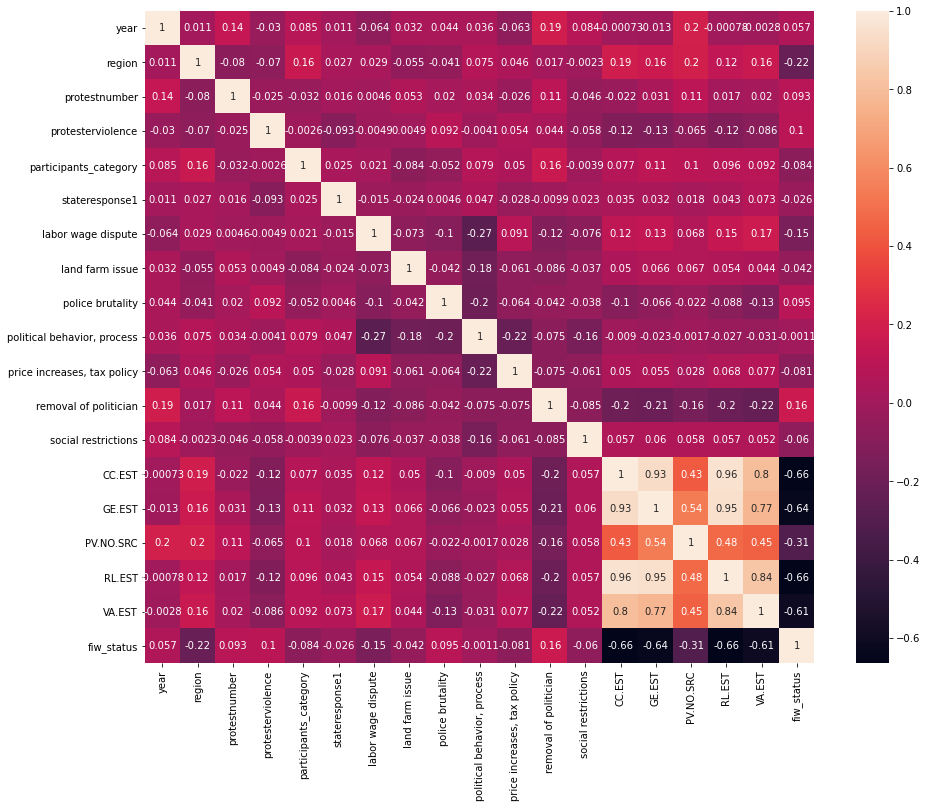

In [69]:
plt.figure(figsize = (15,12))
sns.heatmap(m_df.corr(), annot = True);

In [75]:
features = m_df.drop(columns=['stateresponse1', 'country_name', 'start_date', 'end_date']).columns
X = m_df[features]
y = m_df['stateresponse1']

#### KNeighborsClassifier

In [76]:
knn = KNeighborsClassifier()

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=48, stratify=y)

In [79]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
knn.score(X_train, y_train)

0.7192164179104478

In [81]:
knn.score(X_test, y_test)

0.6031175059952039

#### Decision Tree Classifier

In [82]:
tree = DecisionTreeClassifier(random_state=42)

In [83]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [84]:
tree.score(X_train, y_train)

1.0

In [85]:
tree.score(X_test, y_test)

0.6007194244604317

In [86]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [87]:
pipe_params = {
    'ss__with_mean' : [True,False],
    'ss__with_std' : [True,False],
    'knn__p' : [1,2],
    'knn__weights' : ['uniform', 'distance'],
    'knn__n_neighbors': range(1,29,2),
    'knn__metric': ['minkowski', 'manhattan']
}



In [88]:
pipe_gridsearch = GridSearchCV(pipe, # What is the model we want to fit?
                                 pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=1)

In [89]:
pipe_gridsearch.fit(X_train, y_train);

Fitting 5 folds for each of 448 candidates, totalling 2240 fits


In [90]:
pipe_gridsearch.best_score_

0.6853681545636242

In [91]:
pipe_gridsearch.best_estimator_

Pipeline(steps=[('ss', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=27, weights='distance'))])

In [92]:
pipe_gridsearch.score(X_test, y_test)

0.6870503597122302

In [93]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [94]:
tree_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 1, 2],
    'min_samples_split':[2, 3],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [None, 2, 4],
    'max_leaf_nodes': [None, 2, 3],
    'ccp_alpha': [0.0, .01, .001, .0001]
}



In [95]:
tree_gridsearch = GridSearchCV(DecisionTreeClassifier(), # What is the model we want to fit?
                              tree_params, # What is the dictionary of hyperparameters?
                              cv=5, # What number of folds in CV will we use?
                              verbose=1)

In [96]:
tree_gridsearch.fit(X_train_sc, y_train)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.001, 0.0001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2],
                         'max_features': [None, 2, 4],
                         'max_leaf_nodes': [None, 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3],
                         'splitter': ['best', 'random']},
             verbose=1)

In [97]:
tree_gridsearch.best_score_

0.6865660226515656

In [98]:
tree_gridsearch.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [99]:
tree_gridsearch.score(X_test, y_test)

0.5299760191846523

In [100]:
bag_params = {
    'max_samples': [1, 2, 3, 4, 5, 6],
    'max_features': [5, 6, 7, 8, 9],
    'n_estimators': [23, 25, 27, 29, 31], 
    'oob_score': [True, False]

}



In [101]:
bag_gridsearch = GridSearchCV(BaggingClassifier(), # What is the model we want to fit?
                              bag_params, # What is the dictionary of hyperparameters?
                              cv=5, # What number of folds in CV will we use?
                              verbose=1)

In [102]:
bag_gridsearch.fit(X_train_sc,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'max_features': [5, 6, 7, 8, 9],
                         'max_samples': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [23, 25, 27, 29, 31],
                         'oob_score': [True, False]},
             verbose=1)

In [103]:
bag_gridsearch.best_score_

0.5722244725738397

In [104]:
bag_gridsearch.best_params_

{'max_features': 7, 'max_samples': 4, 'n_estimators': 25, 'oob_score': False}

In [105]:
bag_gridsearch.score(X_test_sc, y_test)

0.5407673860911271

In [106]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=25, p=1, weights='distance')
tree = DecisionTreeClassifier(ccp_alpha=.001, random_state=48)
bag = BaggingClassifier(max_features= 9, max_samples= 6, n_estimators= 29,oob_score= False )

In [107]:
estimators = [('knn', KNeighborsClassifier(n_neighbors=3)),('bag', BaggingClassifier(), ('rf', RandomForestClassifier()))]

In [108]:
stacks = StackingClassifier(estimators=estimators, final_estimator=['tree', DecisionTreeClassifier()])

In [109]:
stack_pipe = Pipeline([
    ('norm', Normalizer()),
    ('stacks', StackingClassifier([('knn', KNeighborsClassifier(n_neighbors=3)), ('tree', DecisionTreeClassifier()), ('bag', BaggingClassifier()), ('rf', RandomForestClassifier())]))
])

In [110]:
stack_params = {
    'bag__max_samples': [1, 2, 3, 4, 5, 6],
    'bag__max_features': [5, 6, 7, 8, 9],
    'bag__n_estimators': [23, 25, 27, 29, 31], 
    'bag__oob_score': [True, False],
    'rf__n_estimators': [5,10],
    'tree__criterion': ['gini', 'entropy'],
    'tree__splitter': ['best', 'random'],
    'tree__max_depth': [None, 1, 2],
    'tree__min_samples_split':[2, 3],
    'tree__min_samples_leaf': [1, 2, 3],
    'tree__max_features': [None, 2, 4],
    'tree__ax_leaf_nodes': [None, 2, 3],
    'tree__ccp_alpha': [0.0, .01, .001, .0001]}

stack_grid = GridSearchCV(estimator=stacks, param_grid=stack_params, cv=5)
stack_grid.fit(X_train, y_train)

ValueError: dictionary update sequence element #1 has length 3; 2 is required

In [111]:
stack_pipe_params = {
    'norm__norm' : ['l1', 'l2', 'max']
#     'stacks__knn__p' : [1,2]
#     'knn__weights' : ['uniform', 'distance'],
#     'knn__n_neighbors': range(1,29,2),
#     'knn__metric': ['minkowski', 'manhattan']
}

In [112]:
stack_pipe_gridsearch = GridSearchCV(stack_pipe, # What is the model we want to fit?
                                 stack_pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=1)

In [113]:
stack_pipe_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Users/TJohn/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/TJohn/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('norm', Normalizer()),
                                       ('stacks',
                                        StackingClassifier(estimators=[('knn',
                                                                        KNeighborsClassifier(n_neighbors=3)),
                                                                       ('tree',
                                                                        DecisionTreeClassifier()),
                                                                       ('bag',
                                                                        BaggingClassifier()),
                                                                       ('rf',
                                                                        RandomForestClassifier())]))]),
             param_grid={'norm__norm': ['l1', 'l2', 'max']}, verbose=1)

In [114]:
stacks = StackingClassifier([('knn', KNeighborsClassifier(n_neighbors=3)), ('tree', DecisionTreeClassifier(), 'bag', BaggingClassifier())])

In [115]:
stacks.fit(X_train_sc, y_train)

/Users/TJohn/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                               ('tree', DecisionTreeClassifier(), 'bag',
                                BaggingClassifier())])

In [116]:
stacks.score(X_train, y_train)

0.5750266524520256

In [117]:
stacks.score(X_test, y_test)

0.5743405275779376

### Binomial Classification

#### Purpose: To predict if the stateresponse will be positive or negative to the goals of the protesters. 

In [128]:
b_df = prep_for_multinomial_classification(df, ['fiw_status', 'region'])

In [129]:
b_df.head()

,country_name,year,region,protestnumber,protesterviolence,participants_category,stateresponse1,start_date,end_date,duration,...,"political behavior, process","price increases, tax policy",removal of politician,social restrictions,CC.EST,GE.EST,PV.NO.SRC,RL.EST,VA.EST,fiw_status
0,Canada,2006,5,1,1,3,crowd dispersal,2006-02-21,2006-08-17,178,...,1,0,0,0,1.962554,1.895545,8.0,1.814535,1.415595,0
1,Canada,2007,5,1,0,5,ignore,2007-06-29,2007-06-29,1,...,1,0,0,0,2.000900,1.761394,8.0,1.814706,1.384672,0
2,Canada,2008,5,1,1,3,crowd dispersal,2008-08-10,2008-08-10,1,...,0,0,0,0,2.002689,1.791681,8.0,1.808290,1.407529,0
3,Canada,2009,5,1,0,7,ignore,2009-05-13,2009-05-13,1,...,1,0,0,0,2.061789,1.745890,8.0,1.804082,1.401846,0
4,Canada,2009,5,2,1,3,arrests,2009-11-10,2009-11-10,1,...,1,0,0,0,2.061789,1.745890,8.0,1.804082,1.401846,0


In [130]:
b_df['stateresponse1'].value_counts()

ignore             4445
crowd dispersal    2365
arrests             572
accomodation        499
shootings           232
killings            115
beatings             98
unknown              12
Name: stateresponse1, dtype: int64

In [131]:
b_df['response_target'] = [1 if row == 'accomodation' else 0 for row in b_df['stateresponse1']]

In [132]:
b_df.head()

,country_name,year,region,protestnumber,protesterviolence,participants_category,stateresponse1,start_date,end_date,duration,...,"price increases, tax policy",removal of politician,social restrictions,CC.EST,GE.EST,PV.NO.SRC,RL.EST,VA.EST,fiw_status,response_target
0,Canada,2006,5,1,1,3,crowd dispersal,2006-02-21,2006-08-17,178,...,0,0,0,1.962554,1.895545,8.0,1.814535,1.415595,0,0
1,Canada,2007,5,1,0,5,ignore,2007-06-29,2007-06-29,1,...,0,0,0,2.000900,1.761394,8.0,1.814706,1.384672,0,0
2,Canada,2008,5,1,1,3,crowd dispersal,2008-08-10,2008-08-10,1,...,0,0,0,2.002689,1.791681,8.0,1.808290,1.407529,0,0
3,Canada,2009,5,1,0,7,ignore,2009-05-13,2009-05-13,1,...,0,0,0,2.061789,1.745890,8.0,1.804082,1.401846,0,0
4,Canada,2009,5,2,1,3,arrests,2009-11-10,2009-11-10,1,...,0,0,0,2.061789,1.745890,8.0,1.804082,1.401846,0,0


In [136]:
features = b_df.drop(columns=['country_name', 'start_date', 'end_date']).columns
X = b_df[features]
y = b_df['protesterviolence']

### Baseline Model

Based on the majority class, this model will be accurate 74% of the time. 

In [137]:
y.value_counts(normalize=True)

0    0.741065
1    0.258935
Name: protesterviolence, dtype: float64

In [140]:
logreg = LogisticRegression(max_iter=10_000)

In [141]:
logreg.fit(X_train, y_train)

/Users/TJohn/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000)

In [142]:
logreg.score(X_train, y_train)

0.6693763326226013

In [143]:
logreg.score(X_test, y_test)

0.6354916067146283